# Synthetic data augmentation

This notebook demonstrates how the `IAMSyntheticDataGenerator` class is used to generate synthetic line/form images. The idea is to generate synthetic IAM samples by stitching together images of random words. This is possible because the IAM dataset includes word-level segmentation.

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import math
from pathlib import Path
from copy import copy

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import models
import cv2 as cv
import matplotlib.pyplot as plt

In [7]:
IAM_ROOT = '/home/tobias/datasets/IAM/'

In [8]:
def imshow(im):
    plt.imshow(im, cmap='gray')
    plt.axis('off')

This notebook demonstrates how the `IAMSyntheticDataGenerator` class is used to generate synthetic line/form images.

## Generate lines

The amount of variation in one line can be controlled by setting the `words_per_sequence` argument in the `IAMSyntheticDataGenerator`, which is an integer range from which will be sampled. This dictates the length of a single span of words sampled from a random document. For lines, this is set a bit lower than for forms, because lines generally contain less words.

In [59]:
from data import IAMSyntheticDataGenerator

# Initialize dataset.
ds_synth_line = IAMSyntheticDataGenerator(
    iam_root=IAM_ROOT,
    sample_form=False,
    words_per_sequence=(2, 3),
    words_per_line=(9, 12)
)

often, which includes stage in who tried stood


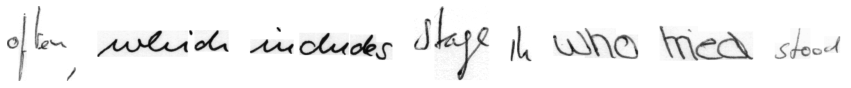

In [65]:
# Sample a synthetic image.
img, target = ds_synth_line[0]

plt.figure(figsize=(15, 10))
imshow(img)
print("".join(ds_synth_line.iam_words.label_enc.inverse_transform(target)))

## Generate forms

In [9]:
from data import IAMSyntheticDataGenerator

# Initialize dataset.
ds_synth_form = IAMSyntheticDataGenerator(
    iam_root=IAM_ROOT,
    sample_form=True,
)

What harm could possibly have
come to Forrest is equally certain that the
British Government will welcome them. How
while the goods which Germany exports
will be made a, in the 1960s, no
cure action, magnetism, the
behaviour of gases and so on theory
of textual dislocation take it for granted
that the Gospel imagination which asked
the


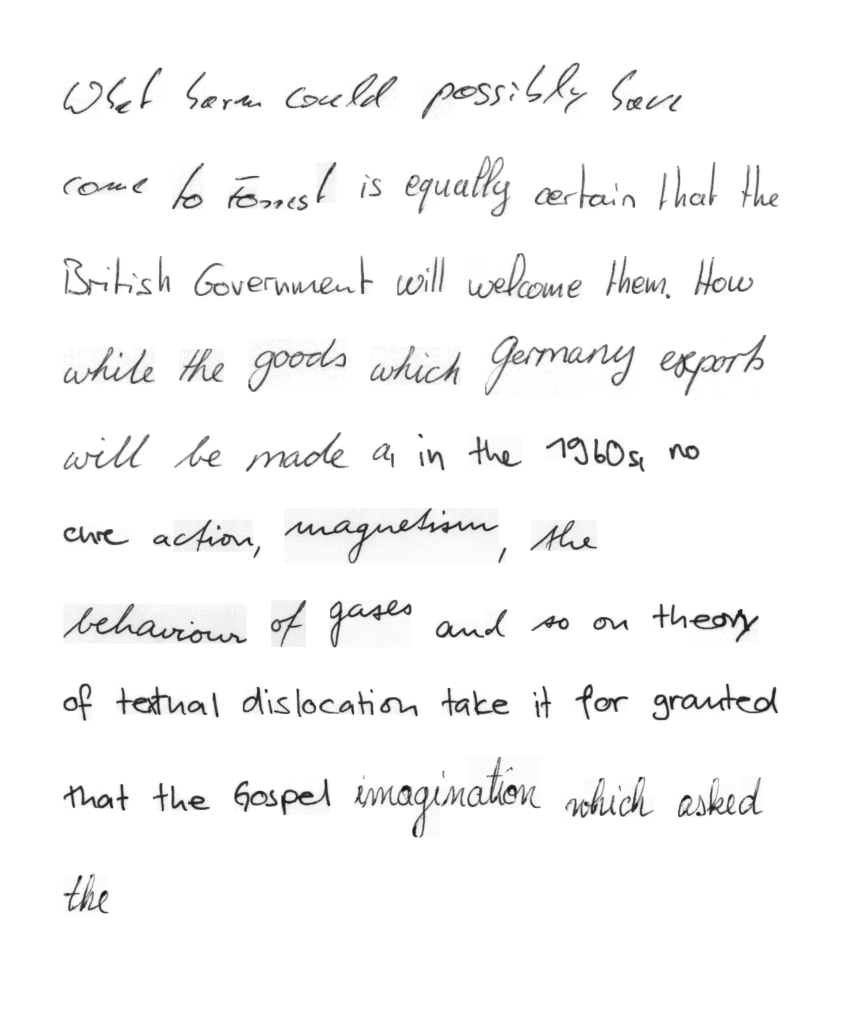

In [12]:
# Sample a synthetic image.
img, target = ds_synth_form[0]

plt.figure(figsize=(15, 25))
imshow(img)
print("".join(ds_synth_form.iam_words.label_enc.inverse_transform(target)))